In [8]:
from scipy.signal import windows
import numpy as np

def old_detect(xn, fs, window_size=1024, hop_size=512, padding=0, window_type='hann'):
    window = []
    true_size = window_size+padding
    match window_type:
        case 'hann':
            window = windows.hann(true_size)
        case 'hamming':
            window = windows.hamming(true_size)
        case 'blackman':
            window = windows.blackman(true_size)
        case 'bartlett':
            window = windows.bartlett(true_size)
        case 'flattop':
            window = windows.flattop(true_size)
        case 'nuttall':
            window = windows.nuttall(true_size)
        case 'blackmanharris':
            window = windows.blackmanharris(true_size)
        case 'parzen':
            window = windows.parzen(true_size)
        case 'bohman':
            window = windows.bohman(true_size)
        case _:
            raise ValueError(f"Unknown window type: {window_type}")
    
    window_list = []

    frequency_data = []
    time_data = []

    for window_begin in range(0, len(xn), hop_size):
        window_end = window_begin + window_size
        slice = xn[window_begin:window_end]
        ln = len(slice)
        if len(slice) < true_size:
            slice = np.pad(slice, (0, true_size - len(slice)), 'constant')

        windowed = slice*window
        xm = np.fft.rfft(windowed)
        m_max = np.argmax(xm)
        
        frequency_data.append(m_max*fs/(true_size))
        time_data.append(window_end/fs)
    return frequency_data, time_data

In [9]:
from scipy.signal import windows
import numpy as np

def detect(xn, fs, window_size=1024, hop_size=512, padding=0, window_type='hann'):
    window = []
    true_size = window_size+padding
    match window_type:
        case 'hann':
            window = windows.hann(true_size)
        case 'hamming':
            window = windows.hamming(true_size)
        case 'blackman':
            window = windows.blackman(true_size)
        case 'bartlett':
            window = windows.bartlett(true_size)
        case 'flattop':
            window = windows.flattop(true_size)
        case 'nuttall':
            window = windows.nuttall(true_size)
        case 'blackmanharris':
            window = windows.blackmanharris(true_size)
        case 'parzen':
            window = windows.parzen(true_size)
        case 'bohman':
            window = windows.bohman(true_size)
        case _:
            raise ValueError(f"Unknown window type: {window_type}")
    
    window_list = []

    frequency_data = []
    time_data = []

    for window_begin in range(0, len(xn), hop_size):
        window_end = window_begin + window_size
        slice = np.abs(xn[window_begin:window_end])
        ln = len(slice)
        if len(slice) < true_size:
            slice = np.pad(slice, (0, true_size - len(slice)), 'constant')

        windowed = slice*window
        wow = np.correlate(windowed, windowed, mode="same");
        xm = np.fft.rfft(wow)
        xm[:2] = 0
        m_max = np.argmax(xm)
        
        frequency_data.append(m_max*fs/(true_size))
        time_data.append(window_end/fs)
    return frequency_data, time_data

[np.float64(28.7109375), np.float64(14.35546875), np.float64(14.35546875), np.float64(14.35546875), np.float64(14.35546875), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01953125), np.float64(445.01

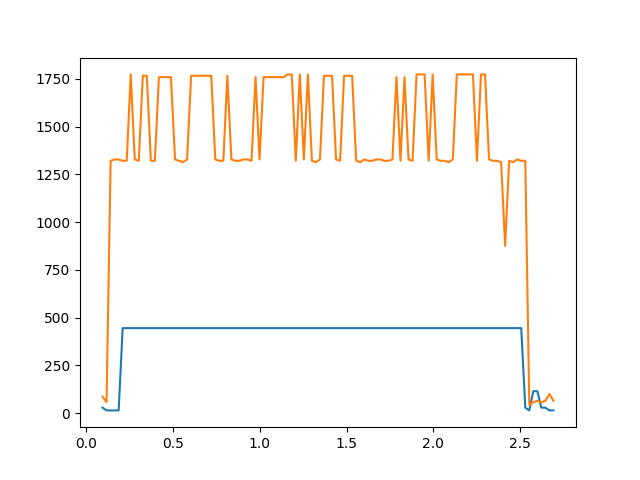

In [10]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib widget

file_path = "sample_audio/Zauberflöte_vocal.wav"

file_path = "sample_audio/A4_oboe.wav"
fs, data = wavfile.read(file_path)
xn = data / 0x8000
frame_size = 4096
hop_size = 1024

freqs, time = detect(xn,fs,frame_size,hop_size,2048)
freqs2, time2 = old_detect(xn,fs,frame_size,hop_size,2048)
print(freqs)

plt.close(2); plt.figure(2)
plt.plot(time, freqs)
plt.plot(time2, freqs2)


c:\Users\V\Documents\Github\AIS2201_Project\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\V\Documents\Github\AIS2201_Project\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


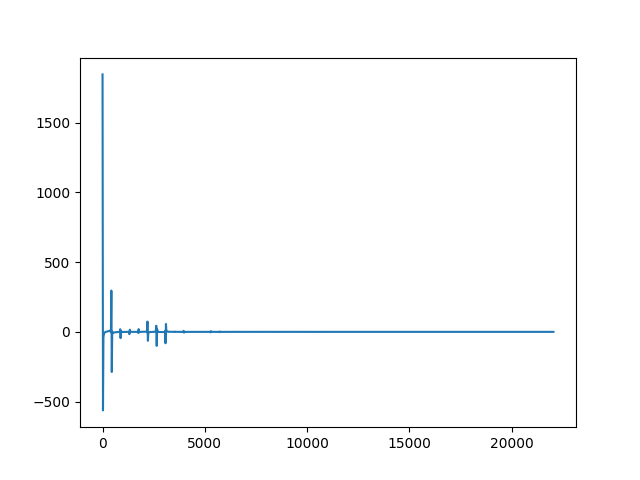

In [11]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib widget

file_path = "sample_audio/A4_oboe.wav"

fs, data = wavfile.read(file_path)
xn = data / 0x8000

window_size = 2048
hop_size = 1024

all_windows = []

for window_begin in range(0, len(xn), hop_size):
    window_end = window_begin + window_size
    slice = np.abs(xn[window_begin:window_end])
    ln = len(slice)
    if ln < window_size:
        slice = np.pad(slice, (0, window_size - ln), 'constant')

    windowed = slice*windows.hann(window_size)
    all_windows.append(windowed)


test_window = all_windows[100]
corr = np.correlate(test_window, test_window, mode="same")
corr_fft = np.fft.rfft(corr)

max_index = np.argmax(np.abs(corr_fft))

plt.close(3); plt.figure(3)
plt.plot(np.arange(0, len(corr_fft))*fs/window_size, corr_fft)

In [81]:
from scipy.signal import windows
import numpy as np

def yin_diff(lag, window):
    diff = 0
    for i in range(len(window)-lag):
        diff += (window[i]-window[i+lag])**2
    return diff

class Yin:
    def diff(this, xn, lag):
        diffs = np.zeros(lag)
        for i in range(lag):
            for j in range(len(xn)-i):
                diffs[i] += (xn[j]-xn[j+i])**2
        return diffs
    
    def normalized_diff(this, diff):
        normalized = np.zeros(len(diff))
        normalized[0] = 1

        lag_sum = 0
        for i in range(1, len(diff)):
            lag_sum += diff[i]
            normalized[i] = diff[i]/(lag_sum/i)
        return normalized
    
    def threshold_lags(this, diff, threshold):
        thresholds = []
        for i in range(len(diff)):
            if diff[i] < threshold:
                thresholds.append(i)
        return thresholds
    
    def local_mins(this, diff, thresholds):
        for lag in thresholds:
            if diff[lag] > diff[lag-1]:
                if diff[lag] < diff[lag+1]:
                    return lag
        return None

    


fs = 48000  # Sampling frequency
duration = 1.0  # seconds
f0 = 200.0  # Hz (frequency of A4)
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
signal = 0.5 * np.sin(2 * np.pi * f0 * t)

# Add some noise
noise = np.random.normal(0, 0.05, signal.shape)
noisy_signal = signal + noise

yin = Yin()
diff = yin.diff(noisy_signal[0:2048], len(noisy_signal[0:2048]))
normalized = yin.normalized_diff(diff)
thresholds = yin.threshold_lags(normalized, 0.1)
sample = yin.local_mins(normalized, thresholds)
print(fs/sample)

199.1701244813278
